**I. Data Cleaning and Preprocessing (for dataset A)**

In [ ]:
#importing all the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

from google.colab import drive
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
from numpy.linalg import eig

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


drive.mount('/content/drive/')
%cd /content/drive/MyDrive/ECE657A

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/ECE657A


Q1. Detect any problems that need to be fixed in dataset A. Report such

---

problems.

In the given dataset,
1. There is one unnamed column present.
2. There are some missing values (denoted by NA) are present.
3. There are also some outliers present.

In [ ]:
DataA_df = pd.read_csv('DataA.csv', usecols=lambda column: column != 'Unnamed: 0')
DataA_df.head()

Total NA Value Counts: 124053
NA Value Counts by Features:
fea.1     1187
fea.2     1188
fea.3     1187
fea.4      800
fea.5      800
          ... 
fea.77     773
fea.78     773
fea.79     773
fea.80     773
fea.81     773
Length: 81, dtype: int64


,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
0,-153.0,414.0,939.0,-161.0,1007.0,99.0,-210.0,948.0,333.0,-19.0,...,655.0,-316.0,-302.0,-617.0,-955.0,-264.0,23.0,-29.0,36.0,24.0
1,-150.0,420.0,939.0,-177.0,1008.0,103.0,-207.0,939.0,316.0,9.0,...,655.0,-309.0,-304.0,-619.0,-955.0,-265.0,19.0,-31.0,47.0,3.0
2,-160.0,432.0,941.0,-162.0,982.0,98.0,-198.0,936.0,315.0,-10.0,...,655.0,-302.0,-308.0,-621.0,-966.0,-270.0,10.0,-38.0,20.0,0.0
3,-171.0,432.0,911.0,-174.0,999.0,115.0,-187.0,918.0,338.0,34.0,...,655.0,-293.0,-312.0,-622.0,-964.0,-269.0,14.0,-51.0,33.0,-1.0
4,-171.0,NaN,929.0,-189.0,1004.0,104.0,-198.0,939.0,350.0,60.0,...,655.0,-284.0,-318.0,-624.0,-966.0,-262.0,24.0,-40.0,1.0,4.0


In [ ]:
## Task 1 : Q1

# NA Values
# Outliers
# Unnamed Column


na_count = DataA_df.isna().sum()
total_na_count = DataA_df.isna().sum().sum()

print("Total NA Value Counts:",total_na_count)

print("NA Value Counts by Features:")
print(na_count)



Total NA Value Counts: 124053
NA Value Counts by Features:
fea.1     1187
fea.2     1188
fea.3     1187
fea.4      800
fea.5      800
          ... 
fea.77     773
fea.78     773
fea.79     773
fea.80     773
fea.81     773
Length: 81, dtype: int64


The output given above describes the total number of missing values in the given Dataset and we can also get missing values count for every features in the dataset

Q2. Fix the detected problems using some of the methods discussed in class

1. Remove Unnamed Column

2. **For Missing Values:**
There are two methods

*   Substitutes estimate value in place of missing value
*   Data Trim or Data Removal (if dataset is large)

3. **For Outliers:**
To Fix this problem, we can replace them with more reasonable values or drop them.
There are 3 ways to fix such problem

*   Box Plots
*   Z-Score
*   Interquartile range(IQR)

In [ ]:
## Task 1 : Q2

column_index_to_keep = 18227

# Trim Bottom rows
DataA_df = DataA_df.iloc[:column_index_to_keep, :]  # Adding 1 to include the column at column_index_to_keep

## Outlier
DataA_df.replace('NA', np.nan, inplace=True)
z_scores = (DataA_df - DataA_df.mean()) / DataA_df.std()

outlier_indices = np.abs(z_scores) > 3
DataA_df = DataA_df[~outlier_indices.any(axis=1)]


## Fill NA
df_filled = DataA_df.fillna(DataA_df.mean())
df_filled.tail()

# check NA now
total_na_count = df_filled.isna().sum().sum()

print("Total NA Value Counts:",total_na_count)

# Linear interpolation
# DataA_df_linear = DataA_df.interpolate(method='linear')

# # Polynomial interpolation with degree 2

# # Spline interpolation
# DataA_df_spline = DataA_df.interpolate(method='spline', order=1)

# # Display the DataFrames with NA values inserted using different interpolation methods
# print("DataFrame with Linear Interpolation:")
# print(DataA_df_linear)
# print("\nDataFrame with Spline Interpolation (Order=2):")
# print(DataA_df_spline)


# Above code(method) for fixing outliers problem is taking too much time to execute

df_filled.head()

Total NA Value Counts: 0


,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
190,-160.0,440.0,934.0,-187.0,997.0,105.0,-209.0,921.0,295.0,25.0,...,600.0,-227.0,-344.0,-686.0,-946.0,-252.0,-21.0,37.0,-81.0,-74.0
191,-154.0,451.0,927.0,-198.0,1024.0,130.0,-209.0,930.0,274.0,4.0,...,602.0,-235.0,-341.0,-683.0,-949.0,-239.0,-22.0,30.0,-47.0,-20.0
192,-150.0,443.0,939.0,-190.0,998.0,112.0,-219.0,941.0,278.0,-16.0,...,604.0,-243.0,-336.0,-680.0,-948.0,-235.0,-23.0,3.0,-30.0,17.0
193,-161.0,442.0,939.0,-180.0,996.0,135.0,-207.0,961.0,295.0,-17.0,...,605.0,-251.0,-330.0,-680.0,-965.0,-241.0,-14.0,-6.0,9.0,36.0
194,-161.0,442.0,940.0,-181.0,991.0,112.0,-212.0,967.0,296.0,-26.0,...,605.0,-259.0,-325.0,-678.0,-980.0,-251.0,-17.0,-27.0,9.0,44.0


Q3. Normalize the data using min-max and z-score normalization. Plot histograms of feature
9 and 24; compare and comment on the differences before and after normalization.

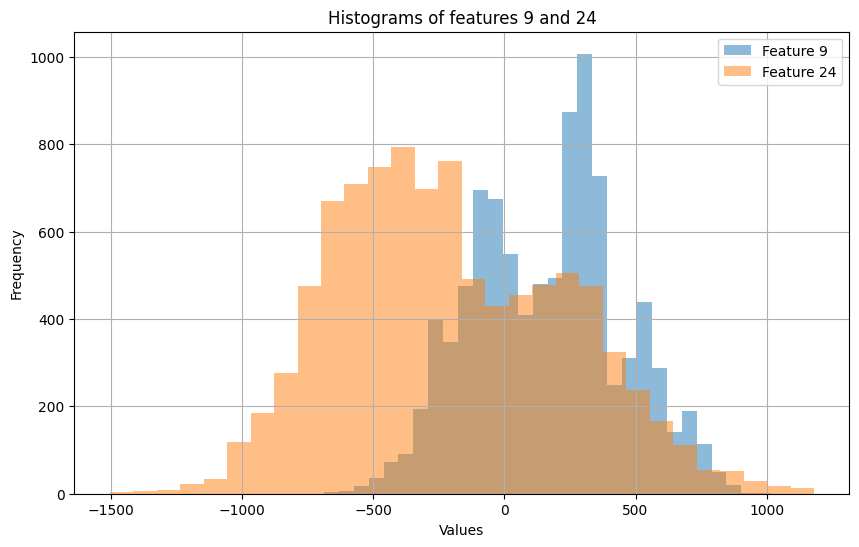

In [ ]:
## Before Normalization

column_9 = df_filled.iloc[:, 8]
column_24 = df_filled.iloc[:, 23]

# Plot histograms for columns 9 and 24
plt.figure(figsize=(10, 6))
plt.hist(column_9, bins=30, alpha=0.5, label='Feature 9')
plt.hist(column_24, bins=30, alpha=0.5, label='Feature 24')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histograms of features 9 and 24')
plt.legend()
plt.grid(True)
plt.show()

**Before Normalization:**
From the above plotted histogram, it is evident that it is a sparse graph, that the data points are quite diverse from each other and ranges are very different for each feature.


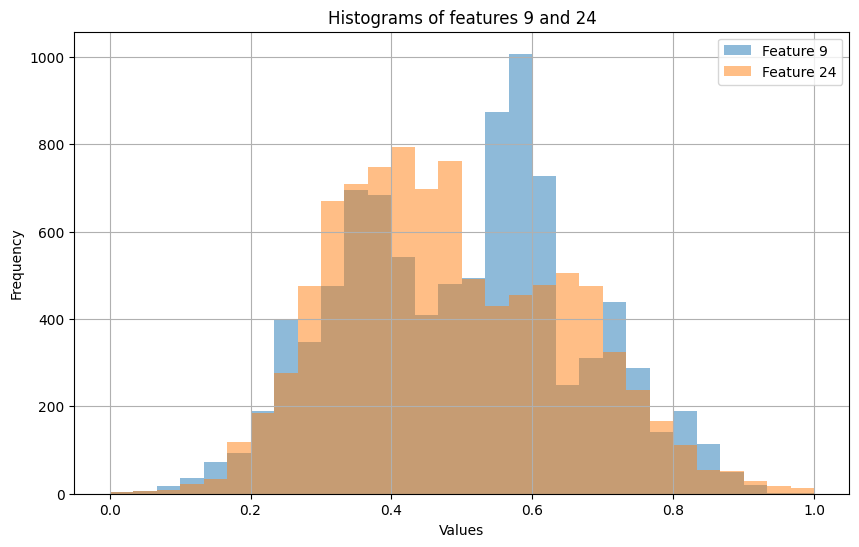

In [ ]:
## After min-max normalization
min_max_scaler = MinMaxScaler()
df_min_max_normalized = pd.DataFrame(min_max_scaler.fit_transform(df_filled), columns=df_filled.columns)

column_9 = df_min_max_normalized.iloc[:, 8]
column_24 = df_min_max_normalized.iloc[:, 23]

# Plot histograms for columns 9 and 24
plt.figure(figsize=(10, 6))
plt.hist(column_9, bins=30, alpha=0.5, label='Feature 9')
plt.hist(column_24, bins=30, alpha=0.5, label='Feature 24')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histograms of features 9 and 24')
plt.legend()
plt.grid(True)
plt.show()

**After min-max Normalization:**
From above histogram, it is evident that it is a dense graph.
we can observe that after min-max normalization both the features have ranges from 0 to 1. Before normalization their ranges were very different from each other. Now after Normalization they both are having the same scale.


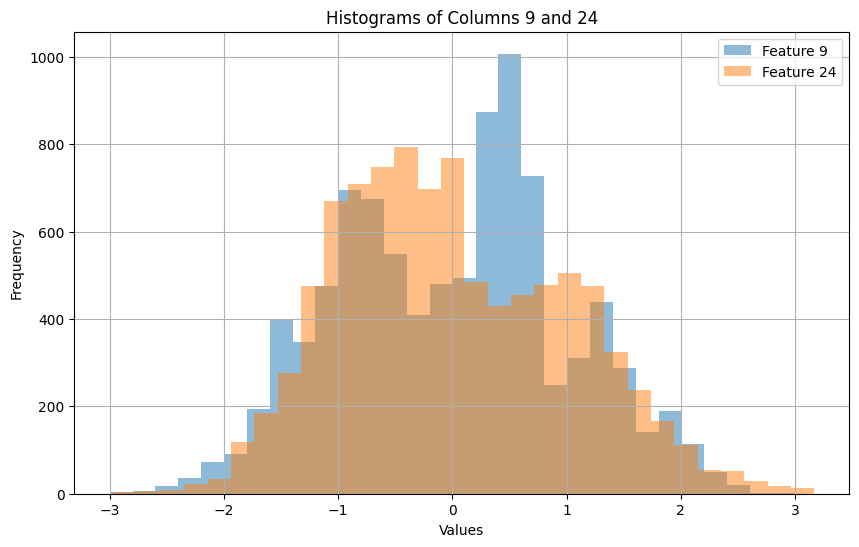

In [ ]:
## After z-score normalization
z_score_scaler = StandardScaler()
df_z_score_normalized = pd.DataFrame(z_score_scaler.fit_transform(df_filled), columns=df_filled.columns)

column_9 = df_z_score_normalized.iloc[:, 8]
column_24 = df_z_score_normalized.iloc[:, 23]

# Plot histograms for columns 9 and 24
plt.figure(figsize=(10, 6))
plt.hist(column_9, bins=30, alpha=0.5, label='Feature 9')
plt.hist(column_24, bins=30, alpha=0.5, label='Feature 24')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histograms of Columns 9 and 24')
plt.legend()
plt.grid(True)
plt.show()

**After Z-score Normalization:** From above histogram, it is evident that it is a dense graph. From the plot we can observe that the positive values of datapoints tells that values are above mean and negative signifies the values below mean.

**II. Feature Extraction (for dataset B)**

In [ ]:
## Task 2

# Loaded DataB
columns_to_exclude = ['Unnamed: 0', 'gnd']
DataB_df = pd.read_csv('DataB.csv', usecols=lambda column: column not in columns_to_exclude)
DataB_df.head()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.775,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784
0,4,4,3,0,0,4,2,1,4,1,...,1,1,3,0,4,2,1,1,4,5
1,5,1,4,3,1,3,5,1,4,4,...,3,1,1,3,3,1,3,3,5,4
2,1,3,0,3,1,1,0,1,0,2,...,4,3,0,2,4,2,2,1,2,4
3,5,3,2,3,5,2,2,0,4,5,...,4,5,4,5,1,4,4,2,4,4
4,3,5,3,3,0,4,1,1,4,3,...,1,1,3,3,3,1,2,4,1,1


Q1. Use PCA as a dimensionality reduction technique to the data, compute the eigenvectors
and eigenvalues.

Q2. Plot a 2-dimensional representation of the data points based on the first and second
principal components. Explain the results versus the known classes (display data points
of each class with a different color).

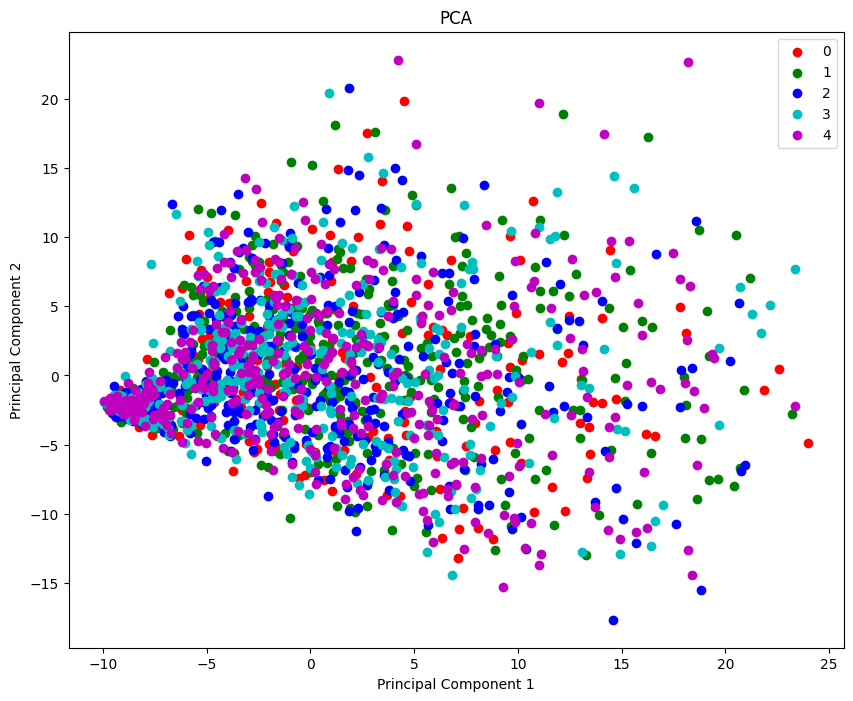

Eigenvalues:
[51.82091992 28.84786351]

Eigenvectors:
[[-0.02942707  0.00195358  0.00149335 ... -0.0001134  -0.00133268
   0.00588009]
 [ 0.04430846 -0.00475855  0.00655974 ... -0.00309972 -0.0091277
  -0.00242521]]


In [ ]:
## Task 2 : Q1 & Q2

# Load the dataset
data = pd.read_csv("DataB.csv")
gnd = data['gnd']

# Separate features and labels
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, 783].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the 2-dimensional representation
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(5):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=colors[i], label=str(i))
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Compute eigenvalues and eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)


Above PCA plot shows the classes of samples based on their similiarity.

In our plot, we can observe that classes appear very close in lower & negative dimension also are quite similar to each other.

However all classes tend to get scattered as the dimension increases on positive axes, also dissimilarity of classes increase.

Q3. Repeat step 2 for the 5th and 6st components. Comment on the result.

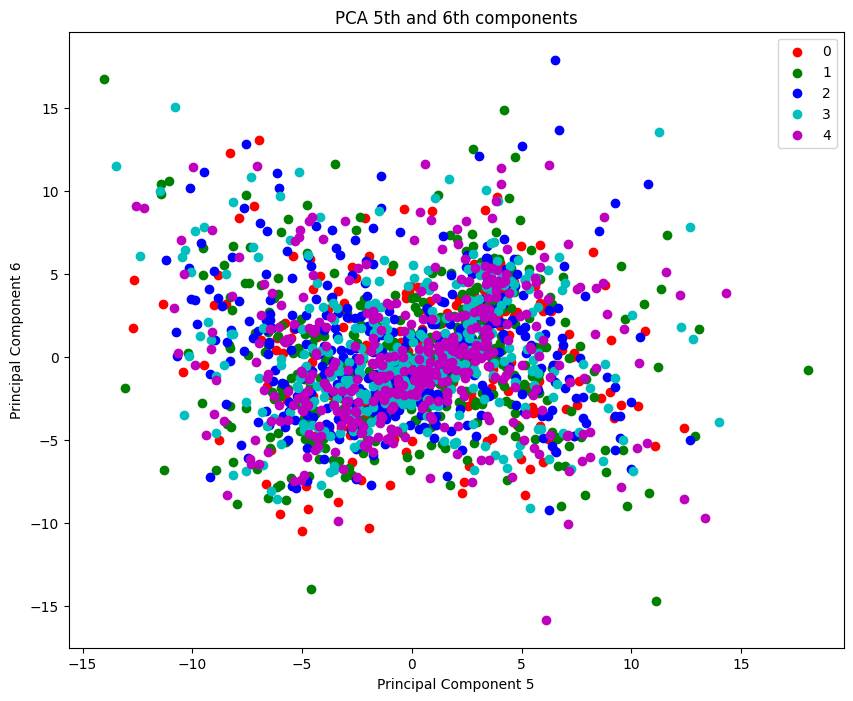

In [ ]:
## Task 2 : Q3

pca = PCA(n_components=6)  # Set n_components=6 to include the 5th and 6th components
X_pca = pca.fit_transform(X_scaled)

# Plot the 2-dimensional representation using the 5th and 6th components
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(5):
    plt.scatter(X_pca[y == i, 4], X_pca[y == i, 5], color=colors[i], label=str(i))
plt.title('PCA 5th and 6th components')
plt.xlabel('Principal Component 5')
plt.ylabel('Principal Component 6')
plt.legend()
plt.show()

In above PCA plot, we can observe that all classes appear very similar to each other in the middle part. As seen in the plot they overlapped by each other in the middle dimension.

All classes have a tendency to get scattered in an overall direction as they are distanced from middle and also their similiarity decrease.

Q4. Use the Naive Bayes classifier to classify 8 sets of dimensionality reduced data (using the
first 2, 4, 10, 30, 60, 200, 500, and all 784 PCA components). Plot the classification error
for the 8 sets against the retained variance of each case.

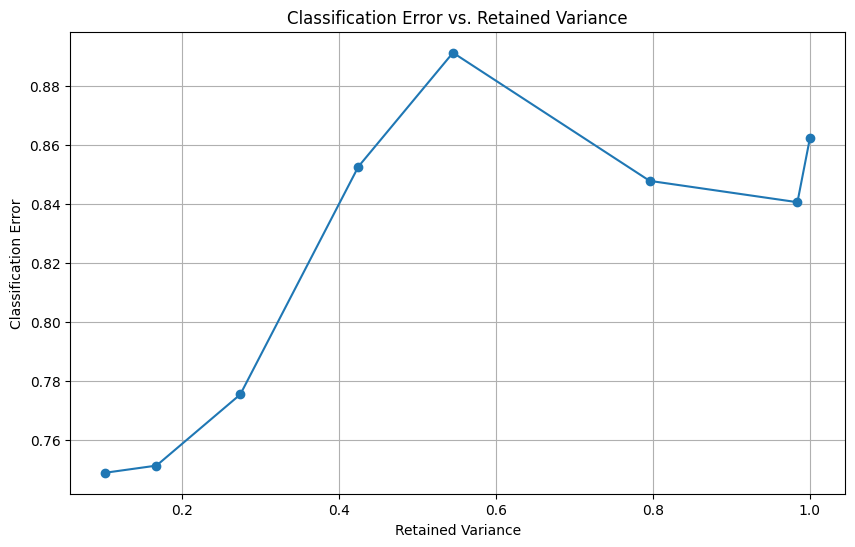

In [ ]:
## Task 2 : Q4

X_scaled = scaler.fit_transform(X)

# Retained variance
variances = []

# errors
errors = []

# numbers of components
for n_components in [2, 4, 10, 30, 60, 200, 500, 784]:

    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Train Naive Bayes
    clf = GaussianNB()
    clf.fit(X_train, y_train)

    # Predict
    y_pred = clf.predict(X_test)

    # accuracy
    accuracy = accuracy_score(y_test, y_pred)
    error = 1 - accuracy

    # Save retained variance and error
    variances.append(np.sum(pca.explained_variance_ratio_))
    errors.append(error)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(variances, errors, marker='o')
plt.title('Classification Error vs. Retained Variance')
plt.xlabel('Retained Variance')
plt.ylabel('Classification Error')
plt.grid(True)
plt.show()

Q5. As the class labels are already known, you can use the Linear Discriminant Analysis (LDA)
to reduce the dimensionality, plot the data points using the first 2 LDA components
(display data points of each class with a different color). Explain the results obtained in
terms of the known classes. Compare with the results obtained by using PCA.

<Axes: xlabel='LDA 1', ylabel='LDA 2'>

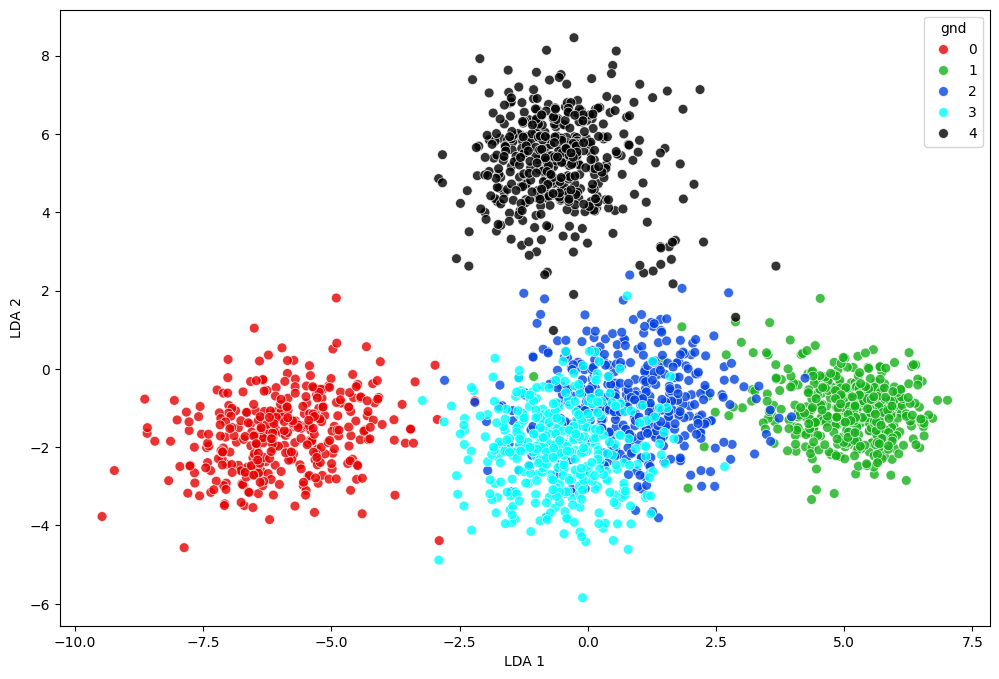

In [ ]:
## Task 2 : Q5

lda = LinearDiscriminantAnalysis(n_components=2)

lda.fit(DataB_df, gnd)
LDA_comp = lda.transform(DataB_df)

LDA_df = pd.DataFrame(LDA_comp,columns=['LDA 1','LDA 2'])

LDA_df['gnd'] = gnd # Actual Class Label

fig, ax = plt.subplots(figsize=(12, 8))
colors = ['red', 'green', 'blue', 'cyan', 'black']
sns.scatterplot(x="LDA 1", y="LDA 2", alpha = 0.8, s = 50,
                hue="gnd", data=LDA_df,
                palette=sns.xkcd_palette(colors),ax=ax)



From the above plot, we can say that the separation between the features can be clearly observed as we can see different classes represented with different colours clustered together.

We can observe that LDA components are able to separate the classes quite well depending on the features.

There is some amount of overlap among green(1), blue(2) and cyan(3) but can be ignored.

**Comparison with the result obtained by using PCA:**

The major difference between PCA and LDA is that PCA is an unsupervised method that aims to find the directions of maximum variance in the data, while LDA is a supervised method that aims to find the projection that best separates the classes in the data.

**Plot we get using Principle component Analysis (PCA 1 vs PCA 2) defines:**

These two components give us the most important characteristic of data by transforming large number of variables into smaller one.

The first principle component can equivalently be defined as a direction that maximizes the variance of the projected data. Since only one principle component is not enough to explain the variation of data in our dataset PCA 2 component is there which increases the approximation as much possible.

**Plot we get using Linear Discriminanat Analysis (LDA 1 vs LDA 2) defines:**

The plot shows the separability among the classes. The total features of given dataset capture the most variation in the data.

Q6. Prove that the PCA is the best linear method for transformation (with orthonormal
bases)

PCA Accuracy: 0.1859903381642512
LDA Accuracy: 0.14492753623188406


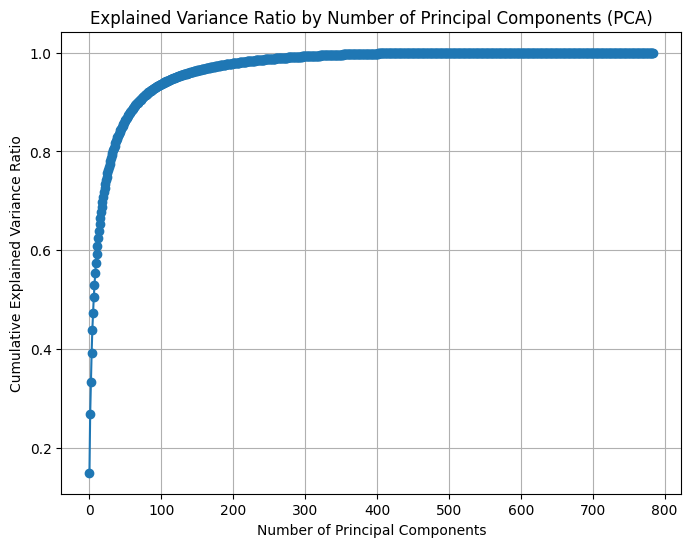

In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Perform LDA
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train a k-nearest neighbors classifier on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# Train a k-nearest neighbors classifier on LDA-transformed data
knn_lda = KNeighborsClassifier(n_neighbors=3)
knn_lda.fit(X_train_lda, y_train)
y_pred_lda = knn_lda.predict(X_test_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)

# Print accuracies
print("PCA Accuracy:", accuracy_pca)
print("LDA Accuracy:", accuracy_lda)

# Plot explained variance ratio for PCA
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Principal Components (PCA)')
plt.grid(True)
plt.show()
